In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE

In [14]:
df = pd.read_csv('data_for_unsupervised_learning.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8981 entries, 0 to 8980
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  8981 non-null   int64  
 1   Avg-min-between-sent-tnx                              8981 non-null   float64
 2   Avg-min-between-received-tnx                          8981 non-null   float64
 3   Time-Diff-between-first-and-last (Mins)               8981 non-null   float64
 4   Sent-tnx                                              8981 non-null   int64  
 5   Received-Tnx                                          8981 non-null   int64  
 6   Number-of-Created-Contracts                           8981 non-null   int64  
 7   Unique-Received-From-Addresses                        8981 non-null   int64  
 8   Unique-Sent-To-Addresses                              8981

In [16]:
X = df.drop('FLAG', axis=1)
y = df['FLAG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

Encoding the categorical variables with TargetEncoder

In [17]:
categories = df.select_dtypes(include='object').columns
categories

Index(['ERC20-most-sent-token-type', 'ERC20_most_rec_token_type'], dtype='object')

In [18]:
encoder = TargetEncoder(cols=categories)
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

In [19]:
train = pd.concat([X_train_encoded, y_train], axis=1)
test = pd.concat([X_test_encoded, y_test], axis=1)

In [23]:
isolation_forest = IsolationForest(contamination='auto', random_state=123)
isolation_forest.fit(train)

training_anomaly_prediction = isolation_forest.predict(train)
test_anomaly_prediction = isolation_forest.predict(test)

is_train = np.sum(training_anomaly_prediction == -1)
is_test = np.sum(test_anomaly_prediction == -1)

print("Number of anomalies in the training set: ", is_train)
#print("Actual anomalies in training: ", np.sum(train['FLAG'] == 1))
print("Number of anomalies in testing set: ", is_test)

Number of anomalies in the training set:  219
Number of anomalies in testing set:  51


In [24]:
tsne = TSNE(n_components=2, random_state=123)
X_train_tsne = tsne.fit_transform(X_train_encoded)

c:\Users\CAE-USER\anaconda3\envs\ai\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\CAE-USER\anaconda3\envs\ai\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


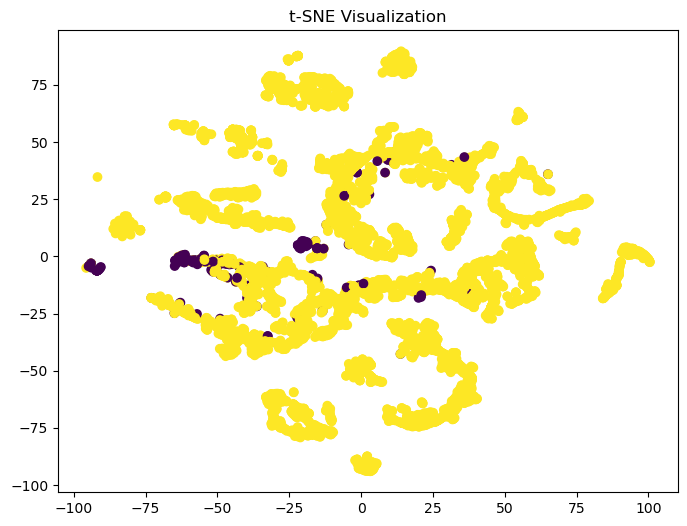

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=training_anomaly_prediction)
plt.title('t-SNE Visualization')
plt.show()